In [ ]:
# Task first
# Data cleaning and processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"/content/NFL Play by Play 2009-2016 (v3).csv")

In [5]:
print(df.head())
print(df.info())
print(df.describe())

         Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
0  2009-09-10  2009091000      1    1   NaN  15:00         15    3600.0   
1  2009-09-10  2009091000      1    1   1.0  14:53         15    3593.0   
2  2009-09-10  2009091000      1    1   2.0  14:16         15    3556.0   
3  2009-09-10  2009091000      1    1   3.0  13:35         14    3515.0   
4  2009-09-10  2009091000      1    1   4.0  13:27         14    3507.0   

   PlayTimeDiff SideofField  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0           0.0         TEN  ...       NaN     0.485675     0.514325   
1           7.0         PIT  ...  1.146076     0.546433     0.453567   
2          37.0         PIT  ...       NaN     0.551088     0.448912   
3          41.0         PIT  ... -5.031425     0.510793     0.489207   
4           8.0         PIT  ...       NaN     0.461217     0.538783   

   Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  Season  
0      0.546433      0.453567  0.485

In [6]:
df.dtypes

Date         object
GameID        int64
Drive         int64
qtr           int64
down        float64
             ...   
Win_Prob    float64
WPA         float64
airWPA      float64
yacWPA      float64
Season      float64
Length: 102, dtype: object

In [7]:
#Checking for missing values
df.isnull().sum()

Date           0
GameID         0
Drive          0
qtr            0
down         471
            ... 
Win_Prob     207
WPA           46
airWPA      1903
yacWPA      1905
Season         1
Length: 102, dtype: int64

In [8]:
#Check for columns with missing values more than 40%
unwanted_col= df.isnull().sum()/len(df)*100
unwanted_col= unwanted_col[unwanted_col>40]
print(unwanted_col)
print(len(unwanted_col))

ExPointResult         97.654995
TwoPointConv          99.839383
DefTwoPoint          100.000000
PuntResult            94.506907
Passer                59.139094
Passer_ID             58.560874
PassOutcome           59.139094
PassLength            59.331834
PassLocation          59.331834
Interceptor           98.715066
Rusher                69.579184
Rusher_ID             68.936717
RunLocation           69.739801
RunGap                77.577899
Receiver              60.713138
Receiver_ID           61.451976
ReturnResult          96.948281
Returner              92.515259
BlockingPlayer        99.935753
Tackler2              85.191134
FieldGoalResult       97.944105
FieldGoalDistance     97.976229
RecFumbTeam           98.843559
RecFumbPlayer         98.843559
ChalReplayResult      99.132669
PenalizedTeam         93.254096
PenaltyType           95.727594
PenalizedPlayer       93.639576
Timeout_Team          95.727594
airEPA                61.130742
yacEPA                61.162865
airWPA  

As more than 34 columns in df have more than 40% missing values, we must drop these columns to create a more robust and stable analysis of the dataset

In [9]:
df= df.drop(columns=unwanted_col.index)
print(df.shape)
print(df.columns)

(3113, 69)
Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100',
       'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp',
       'Touchdown', 'Safety', 'Onsidekick', 'PlayType', 'PassAttempt',
       'AirYards', 'YardsAfterCatch', 'QBHit', 'InterceptionThrown',
       'RushAttempt', 'Reception', 'Tackler1', 'Fumble', 'Sack',
       'Challenge.Replay', 'Accepted.Penalty', 'Penalty.Yards', 'PosTeamScore',
       'DefTeamScore', 'ScoreDiff', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam',
       'Timeout_Indicator', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob',
       'Opp_Touchdown_Prob', 'Field_Goal_Prob', 'Safety_Prob',
       'Touchdown_Prob', 'ExPoint

In [10]:
#Check for columns with less than 13% of missing values
col_lessthan13=df.isnull().mean()*100
col_lessthan13_= col_lessthan13[col_lessthan13<13]
print(col_lessthan13_)
print(col_lessthan13_)

Date            0.000000
GameID          0.000000
Drive           0.000000
qtr             0.000000
time            0.064247
                  ...   
Home_WP_post    7.002891
Away_WP_post    7.002891
Win_Prob        6.649534
WPA             1.477674
Season          0.032123
Length: 67, dtype: float64
Date            0.000000
GameID          0.000000
Drive           0.000000
qtr             0.000000
time            0.064247
                  ...   
Home_WP_post    7.002891
Away_WP_post    7.002891
Win_Prob        6.649534
WPA             1.477674
Season          0.032123
Length: 67, dtype: float64


In [11]:
df=df.drop_duplicates()

In [12]:
duplicates=df[df.duplicated()]
num_duplicates= duplicates.shape[0]
print({num_duplicates})

{0}


In [13]:
print(df.columns[df.nunique()<=60])

print(df.columns[df.nunique()>=60])

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'TimeUnder', 'SideofField',
       'yrdln', 'ydstogo', 'GoalToGo', 'FirstDown', 'posteam', 'DefensiveTeam',
       'PlayAttempted', 'sp', 'Touchdown', 'Safety', 'Onsidekick', 'PlayType',
       'PassAttempt', 'YardsAfterCatch', 'QBHit', 'InterceptionThrown',
       'RushAttempt', 'Reception', 'Fumble', 'Sack', 'Challenge.Replay',
       'Accepted.Penalty', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore',
       'ScoreDiff', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam',
       'Timeout_Indicator', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'ExPoint_Prob', 'TwoPoint_Prob', 'Season'],
      dtype='object')
Index(['time', 'TimeSecs', 'PlayTimeDiff', 'yrdline100', 'ydsnet', 'desc',
       'Yards.Gained', 'AirYards', 'Tackler1', 'No_Score_Prob',
       'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Opp_Touchdown_Prob',
       'Fiel

In [14]:
num_col= df.columns[df.nunique()>60]
num_col

Index(['time', 'TimeSecs', 'PlayTimeDiff', 'yrdline100', 'ydsnet', 'desc',
       'Yards.Gained', 'AirYards', 'Tackler1', 'No_Score_Prob',
       'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Opp_Touchdown_Prob',
       'Field_Goal_Prob', 'Safety_Prob', 'Touchdown_Prob', 'ExpPts', 'EPA',
       'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
       'Win_Prob', 'WPA'],
      dtype='object')

In [15]:
df["FirstDown"].nunique()

2

In [16]:
df["FirstDown"].isnull().mean()*100

7.131384516543528

In [17]:
mod= df['FirstDown'].mode()[0]
df["FirstDown"] = df["FirstDown"].fillna(mod)
df["FirstDown"].isnull().mean()*100

0.0

In [18]:
df["DefensiveTeam"].nunique()

32

In [19]:
df["DefensiveTeam"].isnull().mean()*100

6.649534211371668

In [20]:
mod1= df['DefensiveTeam'].mode()[0]
df["DefensiveTeam"] = df["DefensiveTeam"].fillna(mod)

In [21]:
df['Date']=pd.to_datetime(df['Date'])
df.isnull().mean()*100

Date             0.000000
GameID           0.000000
Drive            0.000000
qtr              0.000000
down            15.130100
                  ...    
Home_WP_post     7.002891
Away_WP_post     7.002891
Win_Prob         6.649534
WPA              1.477674
Season           0.032123
Length: 69, dtype: float64

In [22]:
overall_missing= (df.isnull().sum().sum()/(len(df)*len(df.columns)))*100
print({overall_missing})

{1.8314967155034754}


In [23]:
#Handling Outliers
print(num_col)

Index(['time', 'TimeSecs', 'PlayTimeDiff', 'yrdline100', 'ydsnet', 'desc',
       'Yards.Gained', 'AirYards', 'Tackler1', 'No_Score_Prob',
       'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Opp_Touchdown_Prob',
       'Field_Goal_Prob', 'Safety_Prob', 'Touchdown_Prob', 'ExpPts', 'EPA',
       'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
       'Win_Prob', 'WPA'],
      dtype='object')


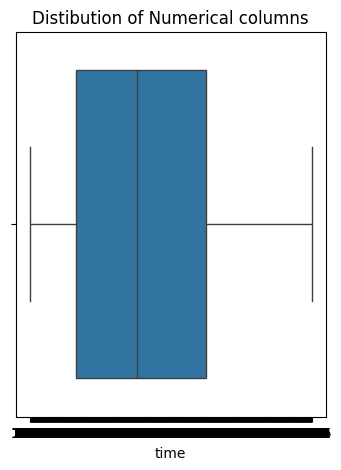

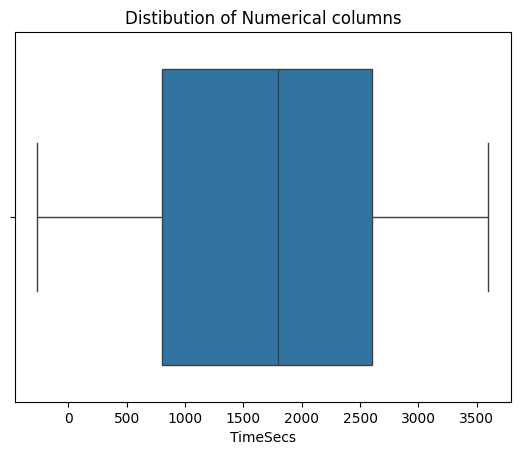

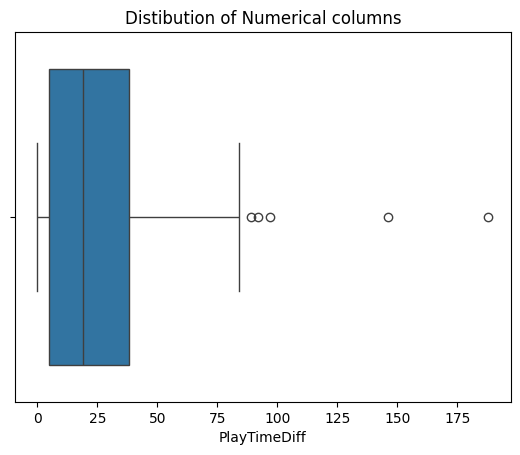

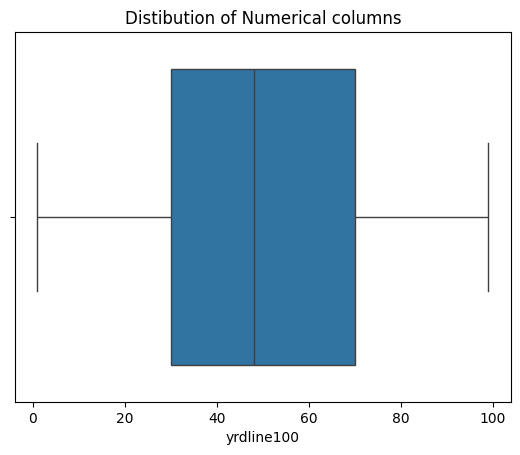

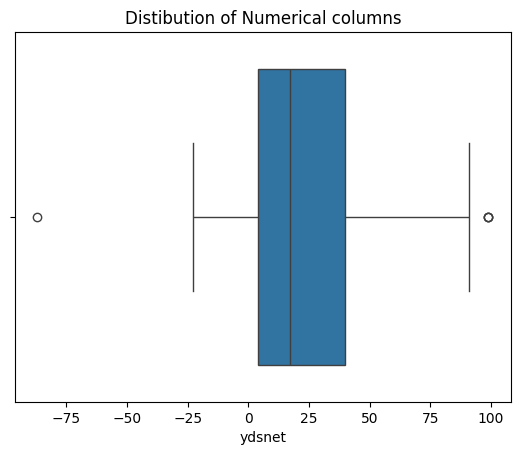

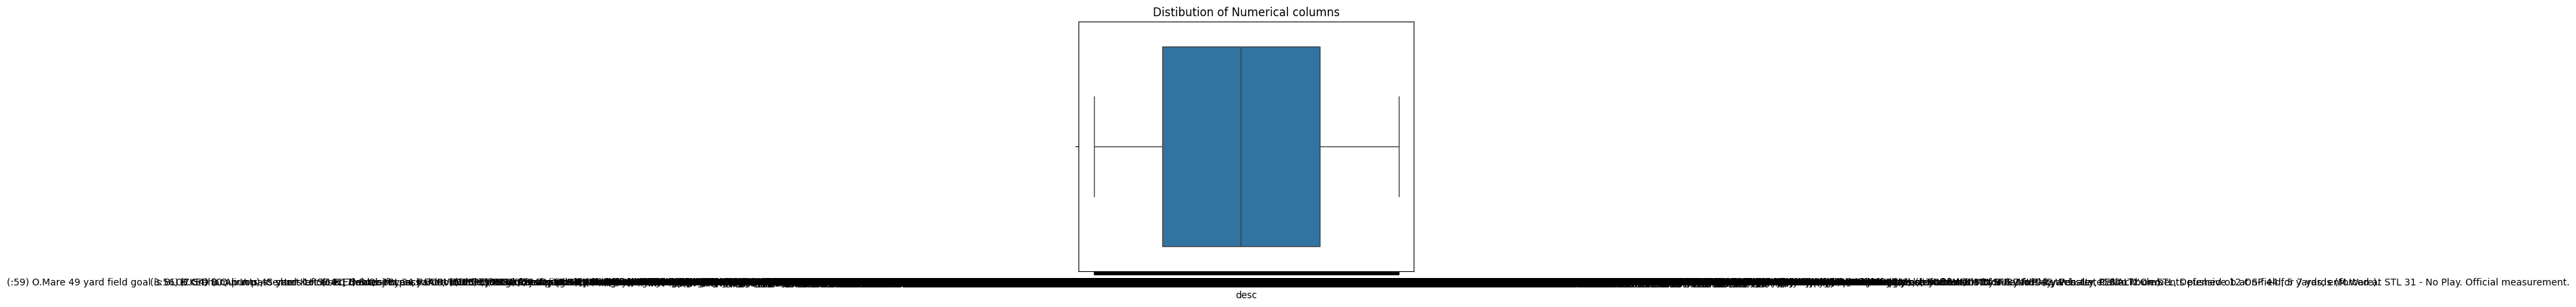

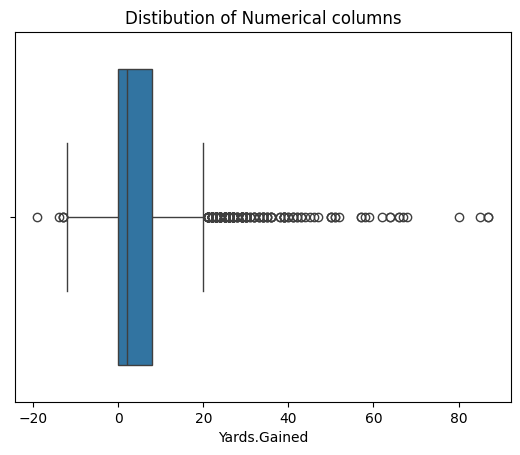

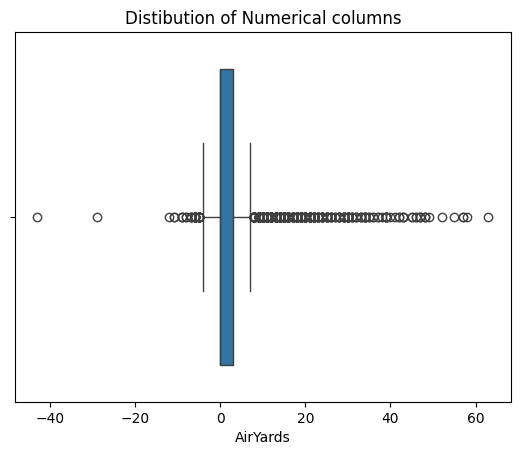

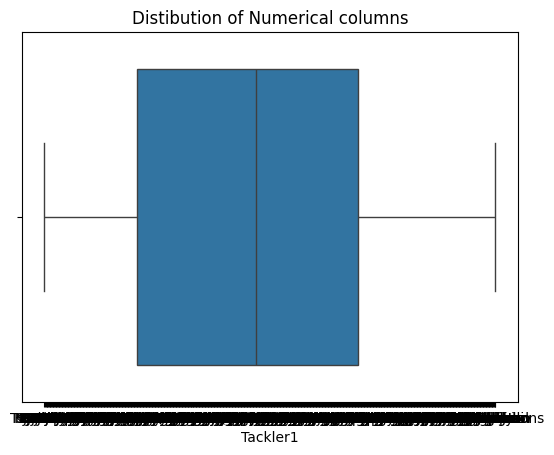

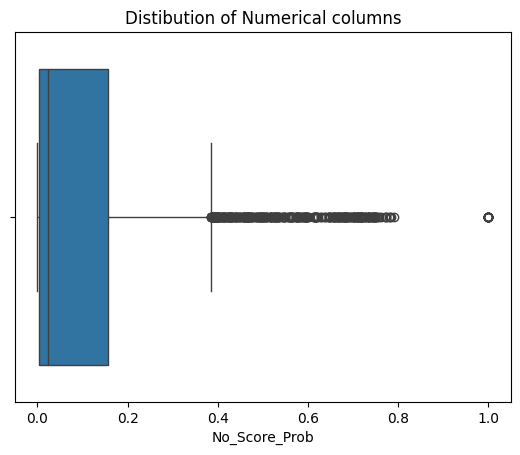

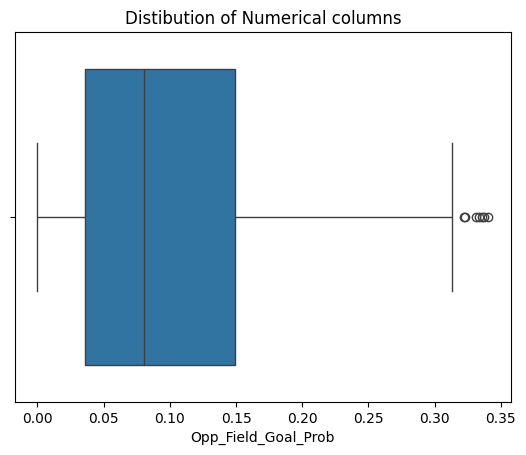

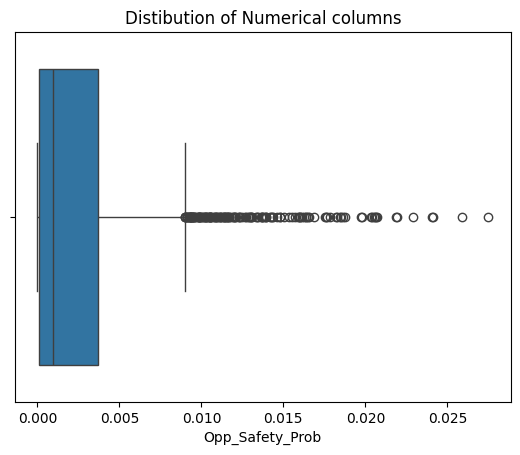

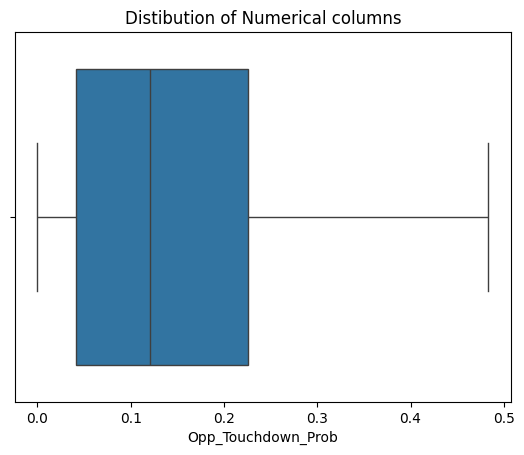

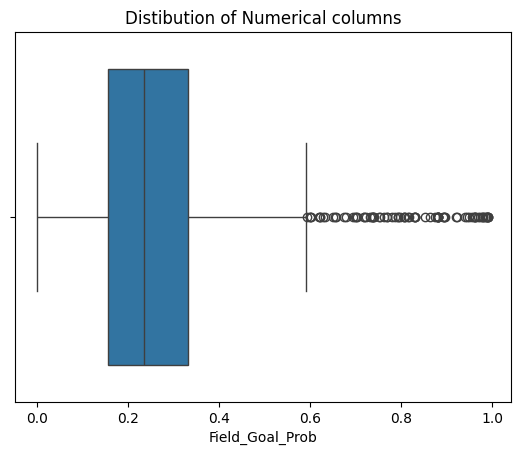

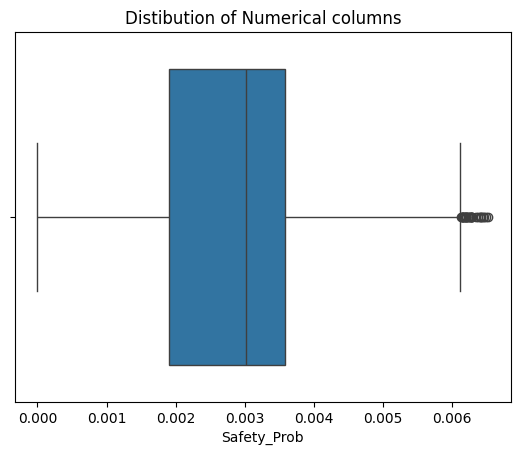

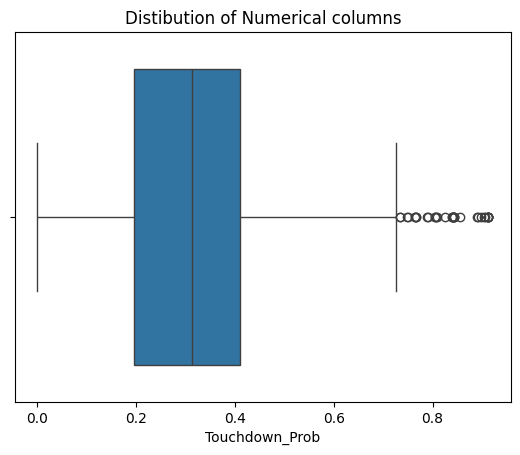

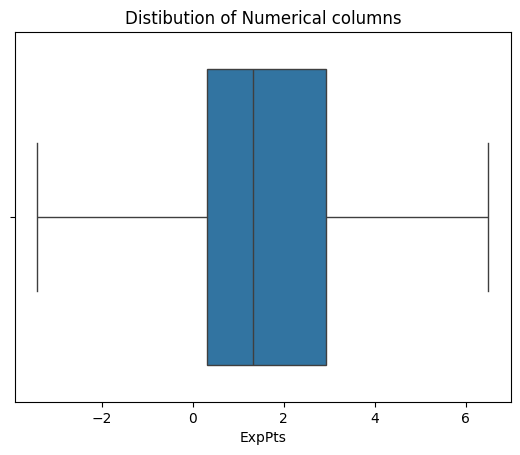

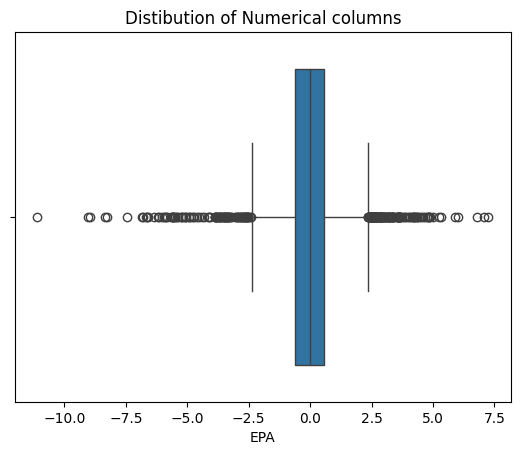

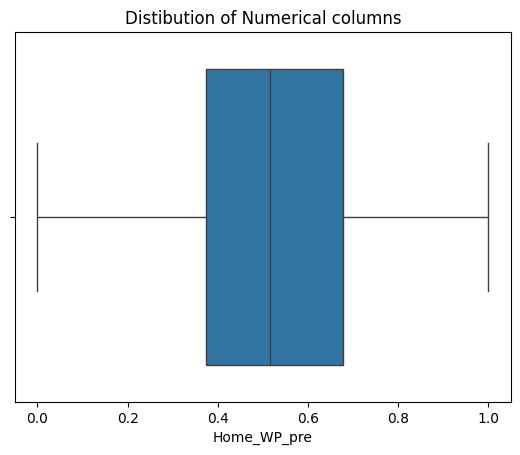

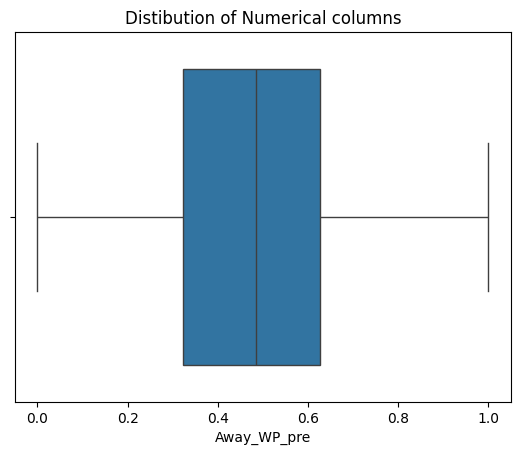

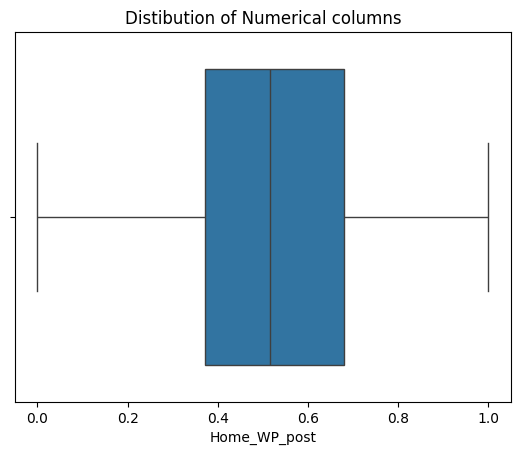

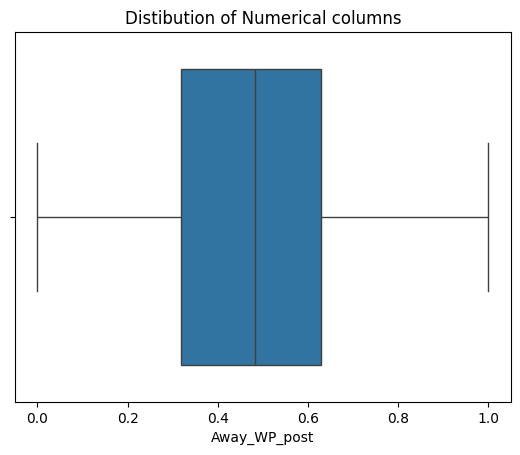

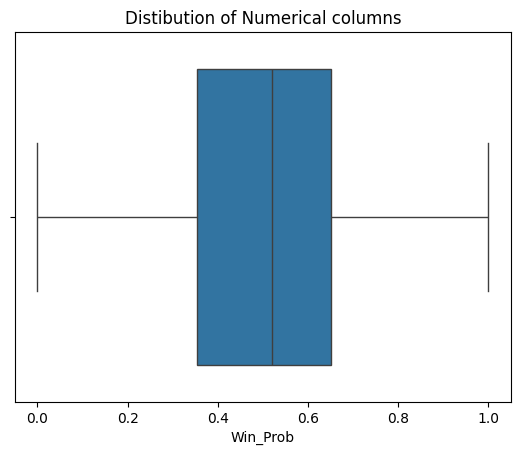

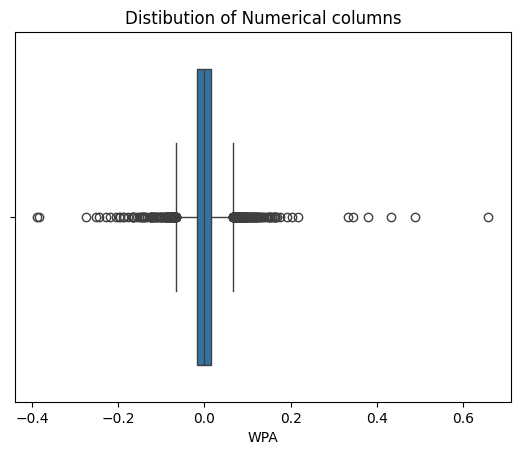

In [24]:
plt.figure(figsize=[4,5])
for cols in num_col:
    sns.boxplot(x=df[cols])
    plt.title("Distibution of Numerical columns")
    plt.show()

In [25]:
game_id_value_count= df['GameID'].value_counts()
print(game_id_value_count)

GameID
2009091302    186
2009091309    184
2009091401    184
2009091307    182
2009091301    182
2009091000    178
2009092000    177
2009091304    172
2009091400    171
2009091308    171
2009091311    170
2009091312    169
2009092001    167
2009091305    163
2009091300    161
2009091306    161
2009091303    157
2009091310    153
2009092008     25
Name: count, dtype: int64


In [26]:
filtered_rows=df[df['GameID']==2011100202]
print(filtered_rows[['HomeTeam','AwayTeam','Home_WP_post','PosTeamScore','DefTeamScore','WPA','ScoreDiff','Season','Win_Prob','ScoreDiff']])

Empty DataFrame
Columns: [HomeTeam, AwayTeam, Home_WP_post, PosTeamScore, DefTeamScore, WPA, ScoreDiff, Season, Win_Prob, ScoreDiff]
Index: []


In [27]:
columns_to_keep=['GameID','Date','HomeTeam','AwayTeam','Home_WP_post','PosTeamScore','DefTeamScore','WPA','ScoreDiff','Season','Win_Prob']
final_scores=df.groupby('GameID')[columns_to_keep].tail(1)

In [28]:
final_scores

,GameID,Date,HomeTeam,AwayTeam,Home_WP_post,PosTeamScore,DefTeamScore,WPA,ScoreDiff,Season,Win_Prob
177,2009091000,2009-09-10,PIT,TEN,NaN,10.0,10.0,NaN,0.0,2009.0,9.555270e-01
349,2009091304,2009-09-13,CLE,MIN,0.0,NaN,NaN,0.0,15.0,2009.0,4.373296e-11
531,2009091307,2009-09-13,NO,DET,1.0,NaN,NaN,0.0,19.0,2009.0,2.220446e-16
702,2009091308,2009-09-13,TB,DAL,0.0,NaN,NaN,0.0,13.0,2009.0,3.281873e-08
865,2009091305,2009-09-13,HOU,NYJ,0.0,NaN,NaN,0.0,18.0,2009.0,2.220446e-16
1026,2009091306,2009-09-13,IND,JAC,1.0,NaN,NaN,0.0,2.0,2009.0,9.946830e-01
1183,2009091303,2009-09-13,CIN,DEN,NaN,7.0,12.0,NaN,-5.0,2009.0,6.932074e-02
1369,2009091302,2009-09-13,CAR,PHI,0.0,NaN,NaN,0.0,26.0,2009.0,2.220446e-16
1551,2009091301,2009-09-13,BAL,KC,1.0,NaN,NaN,0.0,-15.0,2009.0,2.479207e-09
1712,2009091300,2009-09-13,ATL,MIA,1.0,NaN,NaN,0.0,12.0,2009.0,1.311539e-06


In [29]:
final_scores.head()

,GameID,Date,HomeTeam,AwayTeam,Home_WP_post,PosTeamScore,DefTeamScore,WPA,ScoreDiff,Season,Win_Prob
177,2009091000,2009-09-10,PIT,TEN,NaN,10.0,10.0,NaN,0.0,2009.0,9.555270e-01
349,2009091304,2009-09-13,CLE,MIN,0.0,NaN,NaN,0.0,15.0,2009.0,4.373296e-11
531,2009091307,2009-09-13,NO,DET,1.0,NaN,NaN,0.0,19.0,2009.0,2.220446e-16
702,2009091308,2009-09-13,TB,DAL,0.0,NaN,NaN,0.0,13.0,2009.0,3.281873e-08
865,2009091305,2009-09-13,HOU,NYJ,0.0,NaN,NaN,0.0,18.0,2009.0,2.220446e-16
